# Implementation of Kaczmarz algorithm for updating the expansion coefficients
#  in a Polynomial regression

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre
from sklearn.metrics import r2_score #for r-squared

In [15]:
## Function to generate polynomial features using monomial basis functions
## This function can be also defined using a for loop and plain NumPy

def generate_design_matrix_from_1D_data(x_initial,polynomial_order):
    """
    Input: 
    x_initial: shape=(N,) where 'N' is the number of samples
    polynomial_order: scalar: the order of polynomial you want to fit to the data
    
    ouput: design_matrix: shape=(N,polynomial_order+1)
    """
    # Check if x_initial is a scalar
    if np.isscalar(x_initial):
        # If it is, convert it to a numpy array
        x_initial = np.array([x_initial])
    elif isinstance(x_initial, list):
        # If it is a list, convert it to a numpy array
        x_initial = np.array(x_initial)

        
    
    # Generate the polynomial features using sklearn_preprocessing package
    poly_features=PolynomialFeatures(degree=polynomial_order)

    # Update the design matrix using the polynomial features created in the previous step
    design_matrix=poly_features.fit_transform(x_initial.reshape(-1,1))

    return design_matrix

# Legendre Polynomials

The general formula for the Legendre polynomials is given by Rodrigues' formula:

### $$ P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} \left[ (x^2 - 1)^n \right] $$


where:

- $P_n(x)$ is the Legendre polynomial of degree $n$,
- $n$ is a non-negative integer,
- $x$ is the variable,
- $\frac{d^n}{dx^n}$ denotes the $n_{th}$ derivative,
- and $n!$ is the factorial of $n$.


In [16]:
def generate_legendre_design_matrix(x_initial, polynomial_order):
    # If x_initial is a single number, convert it to a numpy array
    if np.isscalar(x_initial):
        x_initial = np.array([x_initial])
        
    N = len(x_initial)
    design_matrix = np.ones((N, polynomial_order + 1), dtype='float64')
    
    for j in range(polynomial_order + 1):
        P_j = legendre(j)
        for i in range(N):
            design_matrix[i, j] = P_j(x_initial[i])
            
    return design_matrix

In [17]:
def legendre_polynomials(x_values):
    results = []
    for x in x_values:
        P0 = 1
        P1 = x
        P2 = (-1 + 3*x**2) / 2
        P3 = (-3*x + 5*x**3) / 2
        P4 = (3 - 30*x**2 + 35*x**4) / 8
        results.append((P0, P1, P2, P3, P4))
    return np.array([results])

In [18]:
x_initial = np.linspace(-1, 1, 100)
polynomial_order = 4

monomial_matrix = generate_design_matrix_from_1D_data(x_initial, polynomial_order)
# print('monomial_matrix: ', monomial_matrix)

print('legendre_polynomials: ', legendre_polynomials(x_initial[1:10]))
legendre_matrix = generate_legendre_design_matrix(x_initial, polynomial_order)
print('legendre_matrix: ', legendre_matrix [1:10])

legendre_polynomials:  [[[ 1.   -0.98  0.94 -0.88  0.81]
  [ 1.   -0.96  0.88 -0.77  0.63]
  [ 1.   -0.94  0.82 -0.66  0.47]
  [ 1.   -0.92  0.77 -0.56  0.33]
  [ 1.   -0.9   0.71 -0.47  0.2 ]
  [ 1.   -0.88  0.66 -0.38  0.09]
  [ 1.   -0.86  0.61 -0.29 -0.01]
  [ 1.   -0.84  0.55 -0.22 -0.1 ]
  [ 1.   -0.82  0.5  -0.14 -0.17]]]
legendre_matrix:  [[ 1.   -0.98  0.94 -0.88  0.81]
 [ 1.   -0.96  0.88 -0.77  0.63]
 [ 1.   -0.94  0.82 -0.66  0.47]
 [ 1.   -0.92  0.77 -0.56  0.33]
 [ 1.   -0.9   0.71 -0.47  0.2 ]
 [ 1.   -0.88  0.66 -0.38  0.09]
 [ 1.   -0.86  0.61 -0.29 -0.01]
 [ 1.   -0.84  0.55 -0.22 -0.1 ]
 [ 1.   -0.82  0.5  -0.14 -0.17]]


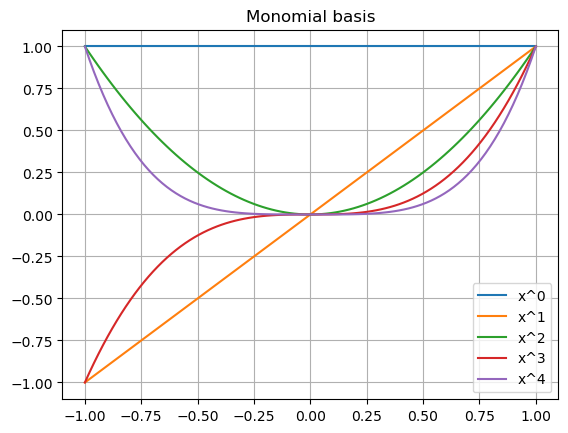

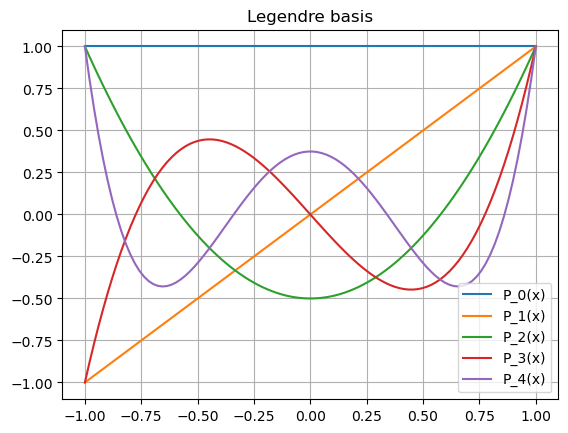

In [11]:
# Plot monomial polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, monomial_matrix[:, j], label=f"x^{j}")
plt.title("Monomial basis")
plt.legend()
plt.grid(True)
plt.show()

# Plot Legendre polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, legendre_matrix[:, j], label=f"P_{j}(x)")
plt.title("Legendre basis")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
def online_kaczmarz_legendre(design_matrix, target_values, polynomial_degree, weights=None):

    design_matrix = generate_legendre_design_matrix(design_matrix, polynomial_degree)
    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.random.rand(polynomial_degree+1) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    # print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    # print('y: ', y.shape)


    a = x[-1,:]
    
    for i in range (design_matrix.shape[0]):
        
        # print('a: ', a.shape)
        
        
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

x :  (100, 1)
y :  (100, 1)
coefficients shape:  (4, 100)
real_coeffs:  [[ 1  2 15 -5]]
coefficients:  [ 0.99  1.98 14.9  -5.02]


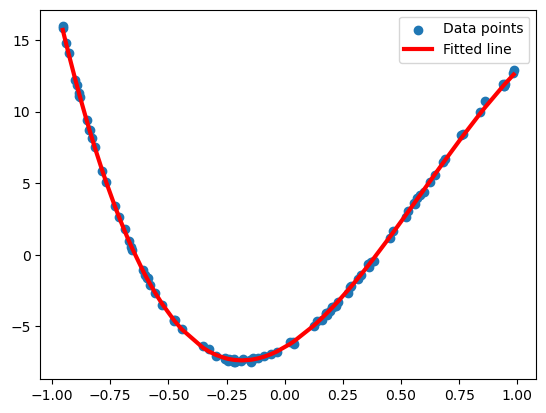

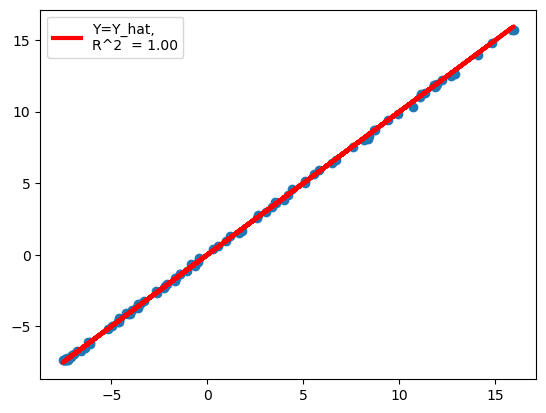

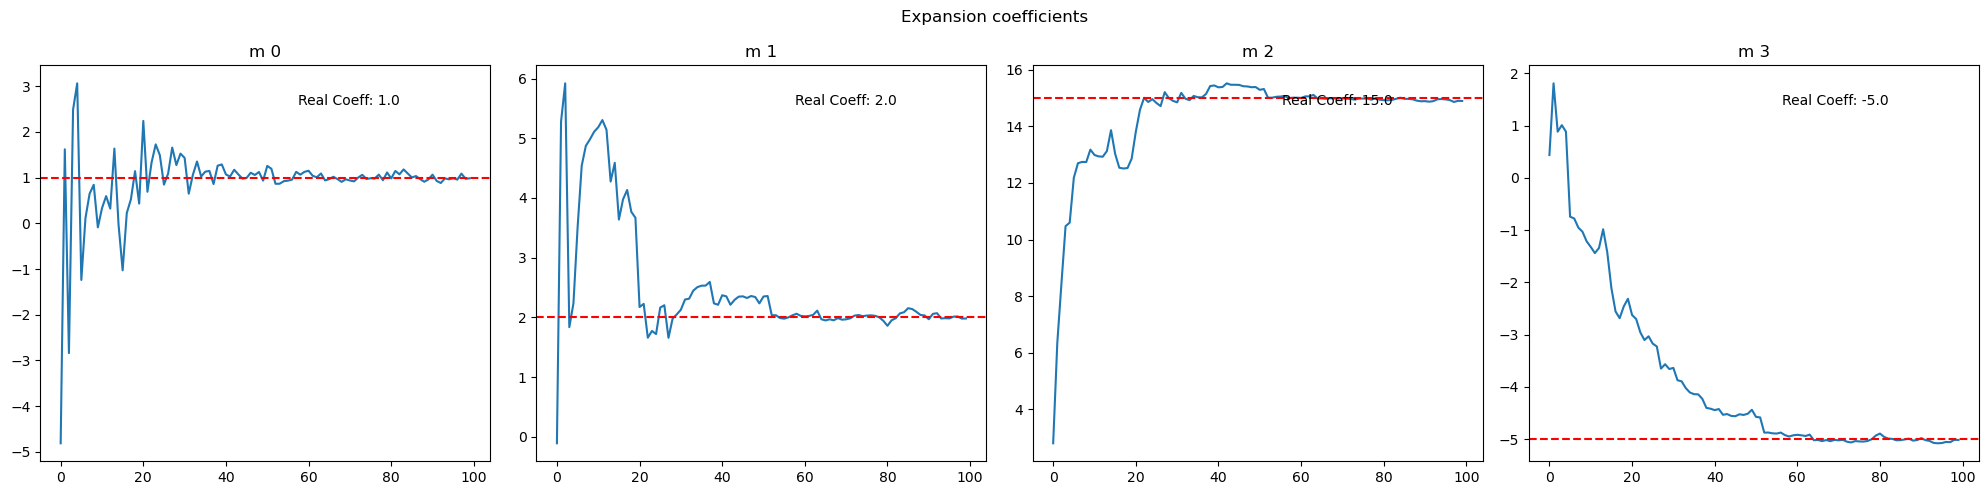

In [20]:
################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 100 # timesteps that generate new datapoints, and are the input for the weights estimates
polynomial_degree = 3

x = np.random.uniform(-1, 1, size=(t,1)) # Generate all x upfront

# Legendre Polynomials
P_0 = 1
P_1 = x
P_2 = 1/2 * (3*x**2 - 1)
P_3 = 1/2 * (5*x**3 - 3*x)


real_coeffs = np.array([[1, 2, 15, -5]])

noise = np.random.normal(scale=0.1, size=(t,1))
y = real_coeffs[0,0] * P_0 + real_coeffs[0,1] * P_1 + real_coeffs[0,2] * P_2 + real_coeffs[0,3] * P_3     + noise

print('x : ', x.shape)
print('y : ', y.shape)




## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz_legendre(x[timestep], y[timestep], polynomial_degree)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz_legendre(x[timestep], y[timestep], polynomial_degree, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:] # All the estimations
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('real_coeffs: ', real_coeffs)
print('coefficients: ', coefficients[:,-1]) # only the last estimation




################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_legendre_design_matrix(x,polynomial_degree) @ weights.T





################################################################################################
####    Plots and graphs
################################################################################################

# # Sort the data by x
sort_indices = np.argsort(x.flatten())
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# Plots
plt.scatter(x, y, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()  # This will add a legend to your plot
plt.show()

#Accuracy plot
r2 = r2_score(y, y_hat)

plt.scatter(y, y_hat)
plt.plot(y,y,color='red', linewidth = 3, label=f'Y=Y_hat, \nR^2  = {r2:.2f}')
plt.legend() 
plt.show()

# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = real_coeffs[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()
